In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from fastai.tabular import DatasetType
import numpy as np

In [3]:
from exp.nb_02 import gini_score
from exp.nb_04 import feature_selector, load_data_bunch, load_learner
from exp.nb_05 import n_valid

In [4]:
n_valid

25891

In [5]:
train_df, test_df = pd.read_pickle('data/train_feature.pickle'), pd.read_pickle('data/test_feature.pickle')

In [6]:
train_df = pd.concat([train_df[:-n_valid].sample(frac=1).reset_index(drop=True), train_df[-n_valid:]])

In [7]:
len(train_df), len(test_df)

(129990, 77392)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129990 entries, 0 to 129989
Columns: 381 entries, id to label
dtypes: bool(188), float64(74), int64(82), object(37)
memory usage: 214.7+ MB


In [ ]:
test_df.sample(3)

,id,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,FIELD_4,...,f7_cb_boolean,f7_cn_boolean,f7_tq_boolean,f7_qt_boolean,f7_hk_boolean,f7_dk_boolean,f7_tl_boolean,f7_hd_boolean,f7_kc_boolean,f7_sv_boolean
53106,43720,missing,missing,29.0,NaN,missing,1,0.0,-1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
22532,35828,tinh ben tre,huyen cho lach,45.0,48.0,none,1,1.0,2903.0,2.0,...,False,True,False,False,False,False,False,False,False,False
5260,31359,tinh an giang,thanh pho long xuyen,40.0,40.0,cong nhan,1,1.0,3637.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_df.sample(3)

,id,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,FIELD_4,...,f7_cn_boolean,f7_tq_boolean,f7_qt_boolean,f7_hk_boolean,f7_dk_boolean,f7_tl_boolean,f7_hd_boolean,f7_kc_boolean,f7_sv_boolean,label
93422,12482,missing,missing,NaN,NaN,missing,1,0.0,-1.0,0.0,...,False,False,False,False,False,False,False,False,False,0
15728,14017,tinh thanh hoa,huyen ha trung,33.0,32.0,cong nhan,0,1.0,3633.0,1.0,...,False,False,False,False,False,False,False,False,False,0
19439,18066,missing,missing,NaN,NaN,missing,1,1.0,732.0,0.0,...,False,False,False,False,False,False,False,False,False,1


In [ ]:
test_ids, valid_ids, embed_params, params = feature_selector(train_df, test_df, n_valid)

Category ['province', 'district', 'maCv', 'FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_12', 'FIELD_13', 'FIELD_17', 'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_23', 'FIELD_24', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29', 'FIELD_30', 'FIELD_31', 'FIELD_35', 'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_39', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_43', 'FIELD_44', 'FIELD_45', 'FIELD_47', 'FIELD_48', 'FIELD_49', 'FIELD_6_cat', 'FIELD_16_cat', 'FIELD_21_cat', 'FIELD_50_cat', 'FIELD_54_cat', 'province_isna', 'district_isna', 'age_source1_isna', 'age_source2_isna', 'maCv_isna', 'FIELD_1_isna', 'FIELD_2_isna', 'FIELD_3_isna', 'FIELD_4_isna', 'FIELD_5_isna', 'FIELD_6_isna', 'FIELD_7_isna', 'FIELD_8_isna', 'FIELD_9_isna', 'FIELD_10_isna', 'FIELD_11_isna', 'FIELD_12_isna', 'FIELD_13_isna', 'FIELD_14_isna', 'FIELD_15_isna', 'FIELD_16_isna', 'FIELD_17_isna', 'FIELD_18_isna', 'FIELD_19_isna', 'FIELD_20_isna', 'FIELD_21_isna', 'FIELD_22_isna', 'FIELD_23_isna', 'FIELD_24_isna', 'FIELD_25_i

In [ ]:
params['cat_names'][25]

'FIELD_39'

In [ ]:
# train_df['FIELD_39']

In [ ]:
assert len(params['valid_ids']) == n_valid

In [ ]:
with_valid = True

In [ ]:
# Train Data Bunch
data = load_data_bunch(**params, with_valid=with_valid)

data.show_batch(rows=3)

province,district,maCv,FIELD_8,FIELD_9,FIELD_10,FIELD_12,FIELD_13,FIELD_17,FIELD_18,FIELD_19,FIELD_20,FIELD_23,FIELD_24,FIELD_25,FIELD_26,FIELD_27,FIELD_28,FIELD_29,FIELD_30,FIELD_31,FIELD_35,FIELD_36,FIELD_37,FIELD_38,FIELD_39,FIELD_40,FIELD_41,FIELD_42,FIELD_43,FIELD_44,FIELD_45,FIELD_47,FIELD_48,FIELD_49,FIELD_6_cat,FIELD_16_cat,FIELD_21_cat,FIELD_50_cat,FIELD_54_cat,province_isna,district_isna,age_source1_isna,age_source2_isna,maCv_isna,FIELD_1_isna,FIELD_2_isna,FIELD_3_isna,FIELD_4_isna,FIELD_5_isna,FIELD_6_isna,FIELD_7_isna,FIELD_8_isna,FIELD_9_isna,FIELD_10_isna,FIELD_11_isna,FIELD_12_isna,FIELD_13_isna,FIELD_14_isna,FIELD_15_isna,FIELD_16_isna,FIELD_17_isna,FIELD_18_isna,FIELD_19_isna,FIELD_20_isna,FIELD_21_isna,FIELD_22_isna,FIELD_23_isna,FIELD_24_isna,FIELD_25_isna,FIELD_26_isna,FIELD_27_isna,FIELD_28_isna,FIELD_29_isna,FIELD_30_isna,FIELD_31_isna,FIELD_32_isna,FIELD_33_isna,FIELD_34_isna,FIELD_35_isna,FIELD_36_isna,FIELD_37_isna,FIELD_38_isna,FIELD_39_isna,FIELD_40_isna,FIELD_41_isna,FIELD_42_isna,FIELD_43_isna,FIELD_44_isna,FIELD_45_isna,FIELD_46_isna,FIELD_47_isna,FIELD_48_isna,FIELD_49_isna,FIELD_50_isna,FIELD_51_isna,FIELD_52_isna,FIELD_53_isna,FIELD_54_isna,FIELD_55_isna,FIELD_56_isna,FIELD_57_isna,FIELD_6_cat_isna,FIELD_16_cat_isna,FIELD_21_cat_isna,FIELD_50_cat_isna,FIELD_54_cat_isna,province_isnone,district_isnone,age_source1_isnone,age_source2_isnone,maCv_isnone,FIELD_1_isnone,FIELD_2_isnone,FIELD_3_isnone,FIELD_4_isnone,FIELD_5_isnone,FIELD_6_isnone,FIELD_7_isnone,FIELD_8_isnone,FIELD_9_isnone,FIELD_10_isnone,FIELD_11_isnone,FIELD_12_isnone,FIELD_13_isnone,FIELD_14_isnone,FIELD_15_isnone,FIELD_16_isnone,FIELD_17_isnone,FIELD_18_isnone,FIELD_19_isnone,FIELD_20_isnone,FIELD_21_isnone,FIELD_22_isnone,FIELD_23_isnone,FIELD_24_isnone,FIELD_25_isnone,FIELD_26_isnone,FIELD_27_isnone,FIELD_28_isnone,FIELD_29_isnone,FIELD_30_isnone,FIELD_31_isnone,FIELD_32_isnone,FIELD_33_isnone,FIELD_34_isnone,FIELD_35_isnone,FIELD_36_isnone,FIELD_37_isnone,FIELD_38_isnone,FIELD_39_isnone,FIELD_40_isnone,FIELD_41_isnone,FIELD_42_isnone,FIELD_43_isnone,FIELD_44_isnone,FIELD_45_isnone,FIELD_46_isnone,FIELD_47_isnone,FIELD_48_isnone,FIELD_49_isnone,FIELD_50_isnone,FIELD_51_isnone,FIELD_52_isnone,FIELD_53_isnone,FIELD_54_isnone,FIELD_55_isnone,FIELD_56_isnone,FIELD_57_isnone,FIELD_6_cat_isnone,FIELD_16_cat_isnone,FIELD_21_cat_isnone,FIELD_50_cat_isnone,FIELD_54_cat_isnone,is_city,age1_less_18,age2_less_18,age1_gt_65,age2_gt_65,FIELD_9_IN_7,f7_no_boolean,f7_qn_boolean,f7_xb_boolean,f7_hc_boolean,f7_nd_boolean,f7_tb_boolean,f7_hg_boolean,f7_xn_boolean,f7_xk_boolean,f7_ms_boolean,f7_te_boolean,f7_bt_boolean,f7_tk_boolean,f7_hs_boolean,f7_ls_boolean,f7_missing_boolean,f7_dt_boolean,f7_ck_boolean,f7_dn_boolean,f7_gb_boolean,f7_hn_boolean,f7_xd_boolean,f7_at_boolean,f7_tc_boolean,f7_ch_boolean,f7_nn_boolean,f7_xv_boolean,f7_ta_boolean,f7_hx_boolean,f7_tn_boolean,f7_gd_boolean,f7_ht_boolean,f7_pv_boolean,f7_ts_boolean,f7_cc_boolean,f7_cb_boolean,f7_cn_boolean,f7_tq_boolean,f7_qt_boolean,f7_hk_boolean,f7_dk_boolean,f7_tl_boolean,f7_hd_boolean,f7_kc_boolean,f7_sv_boolean,age_source1_na,age_source2_na,FIELD_2_na,FIELD_3_na,FIELD_4_na,FIELD_5_na,FIELD_6_na,FIELD_11_na,FIELD_16_na,FIELD_21_na,FIELD_22_na,FIELD_50_na,FIELD_51_na,FIELD_52_na,FIELD_53_na,FIELD_54_na,FIELD_55_na,FIELD_56_na,FIELD_57_na,age_mean_na,age_source1,age_source2,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_11,FIELD_14,FIELD_15,FIELD_16,FIELD_21,FIELD_22,FIELD_32,FIELD_33,FIELD_34,FIELD_46,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,n_cat_na,n_boolean_na,n_cat_none,n_boolean_none,province_CE,district_CE,maCv_CE,FIELD_8_CE,FIELD_9_CE,FIELD_10_CE,FIELD_12_CE,FIELD_13_CE,FIELD_17_CE,FIELD_24_CE,FIELD_35_CE,FIELD_39_CE,FIELD_40_CE,FIELD_41_CE,FIELD_42_CE,FIELD_43_CE,FIELD_44_CE,FIELD_45_CE,FIELD_6_cat_CE,FIELD_16_cat_CE,FIELD_21_cat_CE,FIELD_50_cat_CE,FIELD_54_cat_CE,age_mean,age_source1_IM_const,age_source1_IM_mean,age_source1_IM_median,age_s

In [ ]:
embed_params = {'layers': [1000, 500, 200],
          'ps': [0.002,0.02, 0.01],
          'emb_drop': 0.1,
          'emb_szs':{'province': 8,
                     'district': 4,
                     'maCv':12,
                     'FIELD_13': 10,
                     'FIELD_39': 8},
         }

In [ ]:
learn = load_learner(data, embed_params)
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(65, 8)
    (1): Embedding(704, 4)
    (2): Embedding(207, 12)
    (3): Embedding(4, 3)
    (4): Embedding(36, 12)
    (5): Embedding(4, 3)
    (6): Embedding(7, 5)
    (7): Embedding(220, 10)
    (8): Embedding(10, 6)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(2, 2)
    (13): Embedding(6, 4)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(4, 3)
    (20): Embedding(3, 3)
    (21): Embedding(7, 5)
    (22): Embedding(6, 4)
    (23): Embedding(6, 4)
    (24): Embedding(3, 3)
    (25): Embedding(45, 8)
    (26): Embedding(11, 6)
    (27): Embedding(7, 5)
    (28): Embedding(5, 4)
    (29): Embedding(8, 5)
    (30): Embedding(5, 4)
    (31): Embedding(7, 5)
    (32): Embedding(3, 3)
    (33): Embedding(3, 3)
    (34): Embedding(3, 3)
    (35): Embedding(7, 5)
    (36): Embedding(7,

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


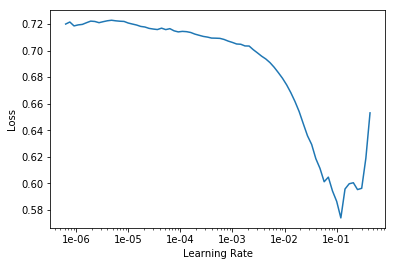

In [ ]:
# select the appropriate learning rate
learn.lr_find()
# we typically find the point where the slope is steepest
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.146654,0.143468,0.966552,01:25
1,0.125209,0.155584,0.963771,01:29
2,0.114002,0.336375,0.958866,01:31


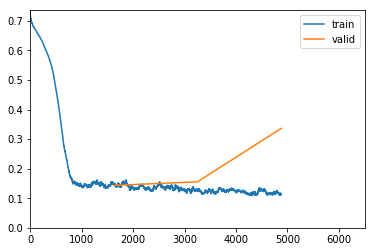

In [ ]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(4, max_lr=slice(1e-03))
# 0.084, 0.982833

In [ ]:
# Predict our target value
if with_valid:
    predictions, *_ = learn.get_preds(DatasetType.Valid)
    y_score = np.array(predictions[:,1].tolist())
    #=======
    id_df = train_df[['id']][-n_valid:]
    id_df['score'] = np.clip(y_score, 0, 1)
    y_score = id_df.groupby('id').mean().reset_index()['score']
    #=======
    print(max(y_score), min(y_score), sum(y_score > 0.5))
    y_valid = list(train_df.iloc[valid_ids][['id', 'label']].drop_duplicates()['label'])
    print(gini_score(y_valid, y_score))

In [ ]:
# Predict our target value
predictions, *_ = learn.get_preds(DatasetType.Test)
y_score = np.array(predictions[:,1].tolist())
#=======
id_df = test_ids.to_frame()
id_df['score'] = np.clip(y_score, 0, 1)
id_df = id_df.groupby('id').mean().reset_index()
y_score = id_df['score']
# #=======
print(max(y_score), min(y_score), sum(y_score > 0.5))

y_score = np.clip(y_score, 0, 1)
# create submission file to submit in Kaggle competition
submission = pd.DataFrame({'id': id_df.id, 'label': y_score})
submission.to_csv('data/submission.csv', index=False)
submission.head(10)